In [1]:
import pandas as pd
import requests
import zipfile
from glob import glob

def get_dataframe_from_url(url,file):
    # downloading data
    response = requests.get(url)
    # extracting filename
    fname = response.headers['Content-Disposition'].split('=')[1]
    if response.ok:  # status_code == 200:
        # opens the file
        with open(fname, 'wb') as f:
            f.write(response.content)
    # unpacking zip
    zipfile.ZipFile(fname, 'r').extractall('.')
    # finding the file
    local_file = glob(file)[0]
    # reads file, skips first 4 rows
    df = pd.read_csv(local_file,skiprows=4)
    return df

# Part 1
Progtammaticly download, extract and prepare the dataset from https://data.worldbank.org/indicator/EN.ATM.CO2E.KT (CO2 emission data)

In [2]:
df = get_dataframe_from_url('http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.KT?downloadformat=csv','./API*KT*.csv')
df.set_index('Country Name',inplace=True)
df.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2508.228,2500.894,1349.456,861.745,872.746,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,707.731,839.743,1008.425,1092.766,...,8463.436,12240.446,10755.311,10014.577,9809.225,NaN,NaN,NaN,NaN,NaN
Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.050,454.708,1180.774,1151.438,1224.778,1188.108,1554.808,...,29057.308,30340.758,33399.036,32617.965,34763.160,NaN,NaN,NaN,NaN,NaN
Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,2552.232,...,4598.418,5240.143,4910.113,5064.127,5716.853,NaN,NaN,NaN,NaN,NaN
Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,517.047,491.378,487.711,476.710,462.042,NaN,NaN,NaN,NaN,NaN


# Part 2
Extract the data on CO2 emitted from Denmark, and show how the amount has changed from 1960 to 2014.

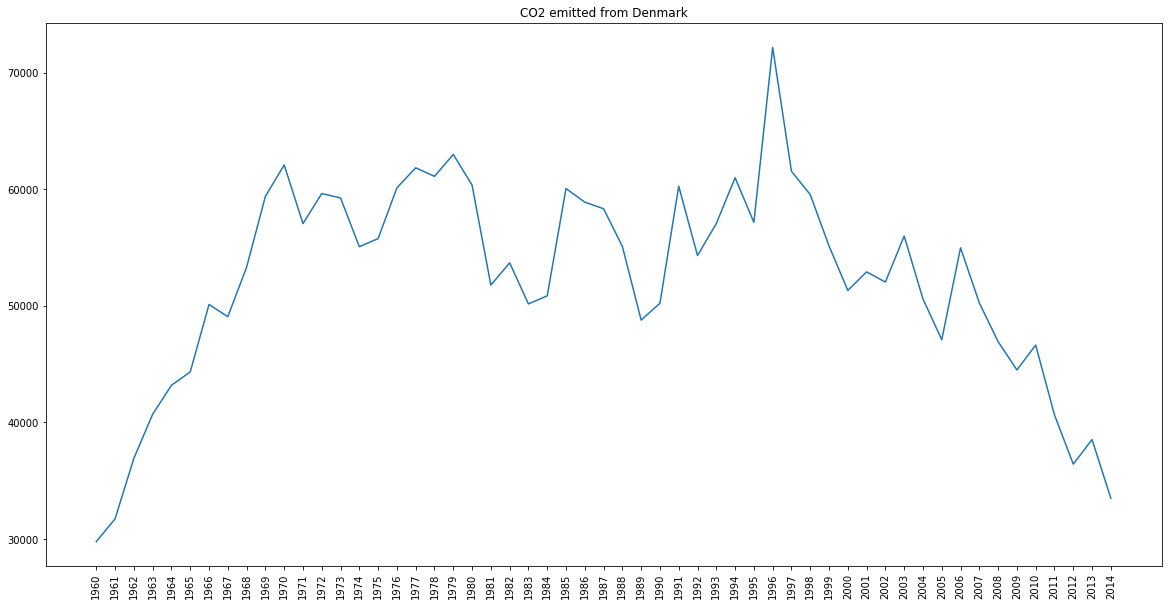

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

DK = df.T.loc['1960':'2014','Denmark']

plt.figure(figsize=(20,10))
plt.plot(DK)
plt.title('CO2 emitted from Denmark')
plt.xticks(rotation='vertical')
plt.show()

# Part 3
Make a graph comparing the CO2 emitted per capital in Denmark and USA

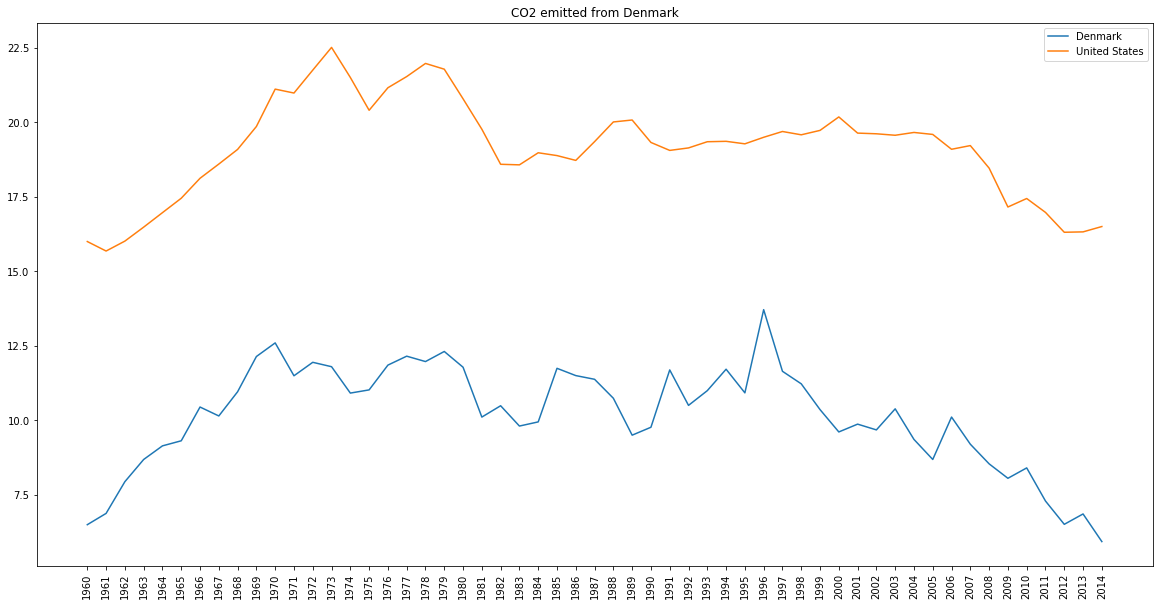

In [5]:
df2 = get_dataframe_from_url('http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.PC?downloadformat=csv','./API*PC*.csv')
df2.set_index('Country Name',inplace=True)

DK = df2.T.loc['1960':'2014','Denmark']
US =  df2.T.loc['1960':'2014','United States']

plt.figure(figsize=(20,10))
plt.plot(DK)
plt.plot(US)
plt.legend()
plt.title('CO2 emitted from Denmark')
plt.xticks(rotation='vertical')
plt.show()